In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/CV assignments notebook/Stanford_dog

/content/drive/MyDrive/CV assignments notebook/Stanford_dog


**Downloading Image file**

In [ ]:
# import requests

# url = "http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar"
# filename = "images.tar"

# # Send a GET request to the URL
# response = requests.get(url)

# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     # Open the file in binary write mode and write the content of the response to it
#     with open(filename, "wb") as f:
#         f.write(response.content)
#     print("File downloaded successfully.")
# else:
#     print("Failed to download the file.")


File downloaded successfully.


In [3]:
!ls

annotation.tar	data  images.tar  stanford_dog.ipynb


**Extracting image file**

In [ ]:
# import tarfile

# # Specify the path to the tar file
# tar_file = "images.tar"

# # Open the tar file
# with tarfile.open(tar_file, "r") as tar:
#     # Extract all contents to the current directory
#     tar.extractall('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data')
#     print("Tar file extracted successfully.")


Tar file extracted successfully.


**Downloading anotation file**

In [ ]:
# import requests

# url = "http://vision.stanford.edu/aditya86/ImageNetDogs/annotation.tar"
# filename = "annotation.tar"

# # Send a GET request to the URL
# response = requests.get(url)

# # Check if the request was successful (status code 200)
# if response.status_code == 200:
#     # Open the file in binary write mode and write the content of the response to it
#     with open(filename, "wb") as f:
#         f.write(response.content)
#     print("File downloaded successfully.")
# else:
#     print("Failed to download the file.")


File downloaded successfully.


**Extracting anotation file**

In [ ]:
# import tarfile

# # Specify the path to the tar file
# tar_file = "annotation.tar"

# # Open the tar file
# with tarfile.open(tar_file, "r") as tar:
#     # Extract all contents to the current directory
#     tar.extractall('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data')
#     print("Tar file extracted successfully.")


Tar file extracted successfully.


In [4]:
import os
for i in os.listdir('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data'):
    print(i, '\n')

Annotation 

Images 

train&val 

cropped_images 



In [5]:
# Extracting the class names
class_names=[]
for i in os.listdir('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation'):
    class_names.append(str(i)[10:])
    #print(i)

num_class = len(class_names)

In [6]:
num_class

120

**Splitting image into train and val**

In [ ]:
# import os
# import random
# import shutil

# def split_data(input_folder, output_train_folder, output_val_folder, split_ratio=0.8, seed=None):
#     # Create output folders if they don't exist
#     if not os.path.exists(output_train_folder):
#         os.makedirs(output_train_folder)
#     if not os.path.exists(output_val_folder):
#         os.makedirs(output_val_folder)

#     # Set random seed for reproducibility
#     if seed is not None:
#         random.seed(seed)

#     # List all class folders in the input folder
#     class_folders = [folder for folder in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, folder))]

#     for class_folder in class_folders:
#         # Create class-specific train and validation folders
#         train_class_folder = os.path.join(output_train_folder, class_folder)
#         val_class_folder = os.path.join(output_val_folder, class_folder)
#         os.makedirs(train_class_folder, exist_ok=True)
#         os.makedirs(val_class_folder, exist_ok=True)

#         # List all image files in the class folder
#         image_files = os.listdir(os.path.join(input_folder, class_folder))

#         # Shuffle the list of image files
#         random.shuffle(image_files)

#         # Calculate the number of files for training and validation
#         num_train = int(len(image_files) * split_ratio)
#         num_val = len(image_files) - num_train

#         # Copy files to the training folder
#         for image_file in image_files[:num_train]:
#             src_file = os.path.join(input_folder, class_folder, image_file)
#             dst_file = os.path.join(train_class_folder, image_file)
#             shutil.copyfile(src_file, dst_file)

#         # Copy files to the validation folder
#         for image_file in image_files[num_train:]:
#             src_file = os.path.join(input_folder, class_folder, image_file)
#             dst_file = os.path.join(val_class_folder, image_file)
#             shutil.copyfile(src_file, dst_file)

# # Example usage:
# input_folder = image_path
# output_train_folder = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/train&val/train'
# output_val_folder = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/train&val/val'

# split_data(input_folder, output_train_folder, output_val_folder, split_ratio=0.8)


In [7]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.image import crop_to_bounding_box

**For storing the image and anotation folder path of each image and it's matching anotation file in a list so that we can iterate over them simultaneously**

In [ ]:
import os

# Paths to annotation and image directories
anotation_dir = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation"
image_dir = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images"

img_path_array = [] # Will have image directory of each class
anotation_path_array = []  # Will have anotation directory of each class

# Iterate over filenames in the annotation directory
for filename in os.listdir(anotation_dir):
      # Assuming annotation files have .xml extension
    annotation_path = os.path.join(anotation_dir, filename)
     # Storing the anotation directories in a list
    anotation_path_array.append(annotation_path)

    # Iterate over filenames in the image directory as the name of subfolders is same in image and anotation folders
    image_path = os.path.join(image_dir,filename)
    # Storing the image directories in a list
    img_path_array.append(image_path)


      # Now you have paths to both annotation and image files
    # print("Annotation Path:", annotation_path)
    # print("Image Path:", image_path)



**For cropping images based on anotation files**

In [ ]:
# import os
# import cv2
# import xml.etree.ElementTree as ET

# def parse_xml_annotation(xml_file):
#     tree = ET.parse(xml_file)
#     root = tree.getroot()

#     # Get image filename
#     filename = root.find('filename').text

#     # Get bounding box coordinates
#     objects = root.findall('object')
#     bboxes = []
#     for obj in objects:

#         class_name = obj.find('name').text

#         bbox = obj.find('bndbox')
#         x_min = int(bbox.find('xmin').text)
#         y_min = int(bbox.find('ymin').text)
#         x_max = int(bbox.find('xmax').text)
#         y_max = int(bbox.find('ymax').text)
#         bboxes.append((x_min, y_min, x_max, y_max))

#     return class_name,filename,bboxes

# def crop_images_from_folder(images_folder, annotations_folder):

#     i=0
#     # Iterate over annotation files in the folder
#     for xml_file in sorted(os.listdir(annotations_folder)):

#         xml_path = os.path.join(annotations_folder, xml_file)
#         breed_name,image_filename,bboxes = parse_xml_annotation(xml_path)

#         # Creating directory for class
#         cropped_img_dir = os.path.join('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images',breed_name)

#         if not os.path.exists(cropped_img_dir):
#           os.makedirs(cropped_img_dir, exist_ok=True)

#         # Load the corresponding image
#         image_path = os.path.join(images_folder, xml_file+".jpg")
#         # Read the image using cv2 (BGR color space)
#         image_bgr = cv2.imread(image_path)
#         # Convert BGR to RGB
#         #image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#     # if xml_file.endswith('.xml'):
#     #     xml_path = os.path.join(annotations_folder, xml_file)
#     #     image_filename, bboxes = parse_xml_annotation(xml_path)

#     #     # Load the corresponding image
#     #     image_path = os.path.join(images_folder, image_filename)
#     #     image = cv2.imread(image_path)

#         # Crop the image based on bounding box coordinates
#         #plt.imshow(image)
#         x_min = bboxes[0][0]
#         y_min = bboxes[0][1]
#         x_max = bboxes[0][2]
#         y_max = bboxes[0][3]

#         cropped_image = image_bgr[y_min:y_max, x_min:x_max]
#         #print(x_min, ' ',y_min, ' ',x_max, ' ',y_max, '\n')
#         #plt.imshow(cropped_image)
#         cv2.imwrite(os.path.join(cropped_img_dir,breed_name+f'_{str(i)}.jpg'),cropped_image)
#         i = i+1

#     return "Images cropped"


# status =""

# for i in range(len(anotation_path_array)):
#   status = crop_images_from_folder( img_path_array[i], anotation_path_array[i])

# print(status)
# # Example usage
# # images_folder = image_path  # Path to the folder containing images
# # annotations_folder = anotation_path_array_  # Path to the folder containing XML annotation files

# # # Crop images based on bounding box values from annotation files
# # cropped_images = crop_images_from_folder(images_folder, annotations_folder)


# # Display the cropped images
# # for i, cropped_image in enumerate(cropped_images):
# #     cv2.imshow(f'Cropped Image {i}', cropped_image)
# # cv2.waitKey(0)
# # cv2.destroyAllWindows()


KeyboardInterrupt: 

**Code for testing purpose to check above code's logic**

In [ ]:
# import cv2

# def parse_xml_annotation(xml_file):
#   tree = ET.parse(xml_file)
#   root = tree.getroot()

#   # Get image filename
#   filename = root.find('filename').text

#   # Get bounding box coordinates
#   objects = root.findall('object')
#   bboxes = []
#   for obj in objects:

#       class_name = obj.find('name').text

#       bbox = obj.find('bndbox')
#       x_min = int(bbox.find('xmin').text)
#       y_min = int(bbox.find('ymin').text)
#       x_max = int(bbox.find('xmax').text)
#       y_max = int(bbox.find('ymax').text)
#       bboxes.append((x_min, y_min, x_max, y_max))

#   return class_name,filename,bboxes



# images_folder = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085620-Chihuahua'
# annotations_folder = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085620-Chihuahua'
# import matplotlib.pyplot as plt
# #cropped_image=[]
# # Iterate over annotation files in the folder
# i=0
# for xml_file in sorted(os.listdir(annotations_folder)):

#         xml_path = os.path.join(annotations_folder, xml_file)
#         breed_name,image_filename,bboxes = parse_xml_annotation(xml_path)

#         # Creating directory for class
#         cropped_img_dir = os.path.join('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images',breed_name)

#         if not os.path.exists(cropped_img_dir):
#           os.makedirs(cropped_img_dir, exist_ok=True)

#         # Load the corresponding image
#         image_path = os.path.join(images_folder, image_filename+".jpg")
#         # Read the image using cv2 (BGR color space)
#         image_bgr = cv2.imread(image_path)
#         # Convert BGR to RGB
#         #image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

#     # if xml_file.endswith('.xml'):
#     #     xml_path = os.path.join(annotations_folder, xml_file)
#     #     image_filename, bboxes = parse_xml_annotation(xml_path)

#     #     # Load the corresponding image
#     #     image_path = os.path.join(images_folder, image_filename)
#     #     image = cv2.imread(image_path)

#         # Crop the image based on bounding box coordinates
#         #plt.imshow(image)
#         x_min = bboxes[0][0]
#         y_min = bboxes[0][1]
#         x_max = bboxes[0][2]
#         y_max = bboxes[0][3]

#         cropped_image = image_bgr[y_min:y_max, x_min:x_max]
#         #print(x_min, ' ',y_min, ' ',x_max, ' ',y_max, '\n')
#         #plt.imshow(cropped_image)
#         cv2.imwrite(os.path.join(cropped_img_dir,breed_name+f'_{str(i)}.jpg'),cropped_image)
#         i = i + 1



#         #cv2.imwrite(cropped_img_dir, image[y_min:y_max, x_min:x_max])

# print(f"Saved {i} cropped images")



# #new_img = crop_images_from_folder('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085620-Chihuahua' ,'/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085620-Chihuahua')

Saved 152 cropped images


In [ ]:
anotation_path_array[0:4]

['/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085620-Chihuahua',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085782-Japanese_spaniel',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085936-Maltese_dog',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02086079-Pekinese']

In [ ]:
img_path_array[0:4]

['/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085620-Chihuahua',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085782-Japanese_spaniel',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085936-Maltese_dog',
 '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02086079-Pekinese']

# Experiments to develop proper code for processing image and it's corresponding anotation data

Folder name creation logic of each class to store its cropped image

In [ ]:
# # /content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images/
# i=0
# for file in sorted(os.listdir(anotation_dir)):
#   print(os.path.join(anotation_dir, str(file)[10:]))
#   i=i+1
#   if i == 5:
#     break

# print('\n')

/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/Chihuahua
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/Japanese_spaniel
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/Maltese_dog
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/Pekinese
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/Shih-Tzu




**Checking if I can access anotation and it's corresponding image file in order**

In [ ]:
# i=0
# for i in range(len(img_path_array)):
#   print(img_path_array[i])
#   print(anotation_path_array[i])
#   print('\n')
#   i=i+1
#   if i==5:
#     break

/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085620-Chihuahua
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085620-Chihuahua


/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085782-Japanese_spaniel
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085782-Japanese_spaniel


/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085936-Maltese_dog
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085936-Maltese_dog


/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02086079-Pekinese
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02086079-Pekinese


/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02086240-Shih-Tzu
/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02086240-Shih-Tzu




In [ ]:
# import xml.etree.ElementTree as ET

# # Path to the XML file
# xml_file = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation/n02085620-Chihuahua/n02085620_10074"

# # Parse the XML file
# tree = ET.parse(xml_file)
# root = tree.getroot()

# # Now you can access the elements in the XML file
# # For example, to access the filename element:
# filename = root.find('filename').text
# print("Filename:", filename)

# # To access bounding box coordinates:
# objects = root.findall('object')
# bboxes = []
# for obj in objects:
#   class_name = obj.find('name').text
#   bbox = obj.find('bndbox')
#   x_min = int(bbox.find('xmin').text)
#   y_min = int(bbox.find('ymin').text)
#   x_max = int(bbox.find('xmax').text)
#   y_max = int(bbox.find('ymax').text)
#   bboxes.append((x_min, y_min, x_max, y_max))

# # for obj in objects:
# #     bbox = obj.find('bndbox')
# #     xmin = bbox.find('xmin').text
# #     ymin = bbox.find('ymin').text
# #     xmax = bbox.find('xmax').text
# #     ymax = bbox.find('ymax').text
# #     print("Bounding Box:", xmin, ymin, xmax, ymax)

# print(bboxes)
# print(class_name)

Filename: n02085620_10074
[(25, 10, 276, 498)]
Chihuahua


In [ ]:
# import os

# # Paths to annotation and image directories
# anotation_dir = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Annotation"
# image_dir = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images"

# img_path_array = [] # Will have image directory of each class
# anotation_path_array = []  # Will have anotation directory of each class

# # Iterate over filenames in the annotation directory
# for filename in os.listdir(anotation_dir):
#       # Assuming annotation files have .xml extension
#     annotation_path = os.path.join(anotation_dir, filename)
#     anotation_path_array.append(annotation_path)


#     image_path = os.path.join(image_dir,filename)
#     img_path_array.append(image_path)


#       # Now you have paths to both annotation and image files
#     # print("Annotation Path:", annotation_path)
#     # print("Image Path:", image_path)



(500, 333, 3)


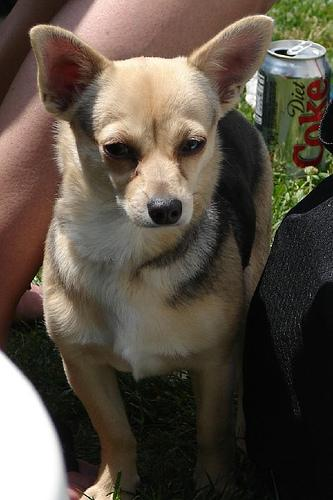

In [ ]:
# import cv2
# from google.colab.patches import cv2_imshow
# import matplotlib.pyplot as plt
# img_chi = cv2.imread('/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/Images/n02085620-Chihuahua/n02085620_10074.jpg')
# # Convert BGR to RGB
# image_rgb = cv2.cvtColor(img_chi, cv2.COLOR_BGR2RGB)
# print(img_chi.shape)
# cv2_imshow(img_chi)
#  # BBOX value to check if the cropping is done right
#   # <xmin>25</xmin>
#   # <ymin>10</ymin>
#   # <xmax>276</xmax>
#   # <ymax>498</ymax>

# cropped_img_chi = img_chi[10:498, 25:276]


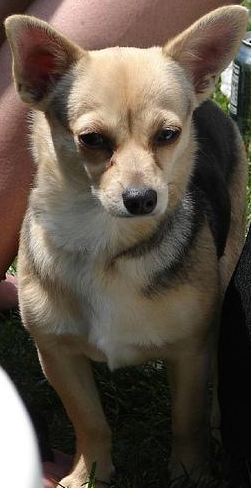

In [ ]:
cv2_imshow(cropped_img_chi)

In [ ]:
final_image_path = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images'

In [ ]:
# Create a dataset from the directory
train_data = keras.utils.image_dataset_from_directory(
    final_image_path,
    labels='inferred',  # Automatically infer labels from subdirectory names
    label_mode='categorical',   # Use integer labels
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=64,      # Batch size
    seed=123,           # Random seed for shuffling
    validation_split=0.25,  # Split the data into training and validation sets (80% training, 20% validation)
    subset='training'   # Specify whether this dataset represents the training or validation subset
)

# Create a validation dataset
validation_data = keras.utils.image_dataset_from_directory(
    final_image_path,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=64,
    seed=123,
    validation_split=0.25,
    subset='validation'
)

Found 20580 files belonging to 120 classes.
Using 15435 files for training.
Found 20580 files belonging to 120 classes.
Using 5145 files for validation.


In [8]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from keras.layers import *
from keras.models import Model
from tensorflow.python.ops.gen_nn_ops import Conv2D
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras import Sequential

Inception= InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3)
)

87910968/87910968 [==============================] - 3s 0us/step


In [9]:
Inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [10]:
for layer in Inception.layers:
    layer.trainable = False

In [11]:
Inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalizati

In [ ]:
model = Sequential([
    VGG19,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(120, activation='softmax')  # 120 output classes
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 120)               61560     
                                                      

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=1, validation_data=validation_data)

357/515 [===================>..........] - ETA: 20:32 - loss: 2.9332 - accuracy: 0.3031

In [ ]:
pwd

'/content/drive/MyDrive/CV assignments notebook/Stanford_dog'

In [12]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                  patience=5) #if val loss decrease for 5 epochs in a row, stop training

# Create ModelCheckpoint callback to save best model during fine-tuning
checkpoint_path = "/content/drive/MyDrive/CV assignments notebook/Stanford_dog"
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                      save_best_only=True,
                                                      monitor="val_loss")

# Creating learning rate reduce callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                 factor=0.2, #multiply the learning rate by 0.2 (reduce by 5x)
                                                 patience=3,
                                                 verbose=1,
                                                 min_lr=1e-7)

In [13]:
num_class

120

In [14]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


**Inception using Keras tuner**

In [15]:
# KERAS TUNER FOR 2 OUTPUT USING RESNET50 CONVOLUTION BASE
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers
from keras.layers import *
import tensorflow as tf
#import keras_tuner
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from kerastuner import RandomSearch

#from keras_tuner import RandomSearch


<ipython-input-15-83e7d19afd94>:11: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
# Assuming you have x_train, y_train_output1, y_train_output2 for training data

def build_model(hp):
    x = Inception.output
    flatten = Flatten()(x)
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)): # Tune the number of hidden layers
        if counter == 0:
            x = Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(flatten)

            x = BatchNormalization(name='batch_norm'+str(i))(x)

            counter = counter + 1

        else:
            x = Dense(units=hp.Int('units_' + str(i), min_value=16, max_value=256, step=16),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(x)

            x = BatchNormalization(name='batch_norm'+str(i))(x)

            counter = counter + 1


    # x = Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu')(input_layer)
    # x = Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32), activation='relu')(x)

    # Output
    output = Dense((num_class), activation='softmax', name='Class')(x)


    model = Model(inputs=Inception.input, outputs=output)

    # Compile the model
    # tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))  <---ADAM OPTIMIZER

    model.compile(
                  optimizer='adam',
                  loss={'Class': 'categorical_crossentropy'},
                  metrics={'Class': 'accuracy'}
                  )

    return model

# Define the search space
tuner = RandomSearch(
    build_model,
    objective='accuracy',  # Adjust the objective as needed
    max_trials=5,
    directory='/content/drive/MyDrive/CV assignments notebook/Stanford_dog',
    project_name='Stanford_dog__Inception_model'
)

# Start the search for the best hyperparameters
tuner.search(train_data,
             epochs=5,
             validation_data=validation_data,
            callbacks = [early_stopping,model_checkpoint])

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.get_best_models(num_models=1)[0]



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
1                 |1                 |num_layers
144               |144               |units_0
relu              |relu              |activation_0

Epoch 1/5
 35/242 [===>..........................] - ETA: 13:04 - loss: 4.8069 - accuracy: 0.0268

KeyboardInterrupt: 

In [ ]:
final_image_path = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images'

**Data Augmentation and training**

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory containing your images
final_image_path = '/content/drive/MyDrive/CV assignments notebook/Stanford_dog/data/cropped_images'

# Create an ImageDataGenerator instance for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.2,  # Shear images by up to 20%
    zoom_range=0.2,  # Zoom images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    validation_split=0.2,
    fill_mode='nearest'  # Fill in missing pixels using the nearest available pixel
)

# Create a separate ImageDataGenerator instance for validation (without augmentation)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.25
    )

# Create flow from directory generators with data augmentation for training and without augmentation for validation
train_generator = train_datagen.flow_from_directory(
    final_image_path,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    subset='training',  # Specify 'training' subset for training data
    shuffle=True  # Shuffle training data
)

val_generator = val_datagen.flow_from_directory(
    final_image_path,
    target_size=(224, 224),  # Resize images to 224x224 pixels
    batch_size=32,
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    subset='validation',  # Specify 'validation' subset for validation data
    shuffle=False  # Don't shuffle validation data
)

# Use the generators in model training or evaluation


Found 16508 images belonging to 120 classes.
Found 5100 images belonging to 120 classes.


In [ ]:
# Assuming you have x_train, y_train_output1, y_train_output2 for training data

def build_model(hp):
    x = Inception.output
    flatten = Flatten()(x)
    counter = 0
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)): # Tune the number of hidden layers
        if counter == 0:
            x = Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(flatten)

            x = BatchNormalization(name='batch_norm'+str(i))(x)

            counter = counter + 1

        else:
            x = Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=256, step=32),
                              activation=hp.Choice('activation_' + str(i), values=['relu']))(x)

            x = BatchNormalization(name='batch_norm'+str(i))(x)

            counter = counter + 1


    # x = Dense(units=hp.Int('units1', min_value=32, max_value=512, step=32), activation='relu')(input_layer)
    # x = Dense(units=hp.Int('units2', min_value=32, max_value=512, step=32), activation='relu')(x)

    # Output
    output = Dense((num_class), activation='softmax', name='Class')(x)


    model = Model(inputs=Inception.input, outputs=output)

    # Compile the model
    # tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4]))  <---ADAM OPTIMIZER

    model.compile(
                  optimizer='adam',
                  loss={'Class': 'categorical_crossentropy'},
                  metrics={'Class': 'accuracy'}
                  )

    return model

# Define the search space
tuner = RandomSearch(
    build_model,
    objective='accuracy',  # Adjust the objective as needed
    max_trials=5,
    directory='/content/drive/MyDrive/CV assignments notebook/Stanford_dog',
    project_name='Stanford_dog__Inception_model'
)

# Start the search for the best hyperparameters
tuner.search(train_generator,
             epochs=5,
             validation_data=val_generator,
            callbacks = [early_stopping,model_checkpoint])
0.
# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.get_best_models(num_models=1)[0]


Reloading Tuner from /content/drive/MyDrive/CV assignments notebook/Stanford_dog/Stanford_dog__Inception_model/tuner0.json

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
2                 |3                 |num_layers
224               |128               |units_0
relu              |relu              |activation_0
32                |32                |units_1
relu              |relu              |activation_1
64                |32                |units_2
relu              |relu              |activation_2
32                |None              |units_3
relu              |None              |activation_3
64                |None              |units_4
relu              |None              |activation_4

Epoch 1/5
362/516 [====================>.........] - ETA: 42:05 - loss: 2.3041 - accuracy: 0.6273